# Llamaradas solares

En este Notebook desarollamos toda la práctica desde el entendimiento de los datos hasta el despliegue. Para conocer el entendimiento del negocio, ver README.md

In [1]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Primero haremos un entendimiento de los datos.

## Entendimiento de los datos

In [3]:
column_names = ["Flare", "Date", "Start time", "Peak time", "End time", "Duration", "Peak counts",
                "Total counts", "Energy", "X pos", "Y pos", "Radial", "Active region",
                "Flag 1", "Flag 2", "Flag 3", "Flag 4", "Flag 5"]

df = pd.read_csv("hessi.solar.flare.UP_To_2018.csv",names=column_names, header = 0)

# Deal with datetime format
df['Start time'] = pd.to_datetime(df['Date'] + ' ' + df['Start time'])
df['Peak time'] = pd.to_datetime(df['Date'] + ' ' + df['Peak time'])
df['End time'] = pd.to_datetime(df['Date'] + ' ' + df['End time'])
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Start time'] >= df['End time'], 'End time'] += pd.Timedelta(days=1)
df.loc[df['Start time'] >= df['Peak time'], 'Peak time'] += pd.Timedelta(days=1)
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [4]:
df.tail()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
116138,18020903,2018-02-09,2018-02-09 16:41:28,2018-02-09 16:42:54,2018-02-09 16:43:32,124,18,2888.00,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
116139,18020904,2018-02-09,2018-02-09 18:15:56,2018-02-09 18:17:26,2018-02-09 18:17:40,104,16,1656.00,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
116140,18021001,2018-02-10,2018-02-10 13:04:36,2018-02-10 13:06:46,2018-02-10 13:07:04,148,15,2224.00,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2
116141,18022601,2018-02-26,2018-02-26 15:49:56,2018-02-26 15:51:18,2018-02-26 15:53:52,236,16,3312.00,6-12,115,192,223,2700,A0,DF,P1,PE,Q2
116142,18030301,2018-03-03,2018-03-03 04:04:08,2018-03-03 04:06:22,2018-03-03 04:12:20,492,42,15816.00,6-12,926,128,935,2700,A0,P1,PE,Q1,NaN


Vemos que los datos comienzan a registrarse desde el año 2002 y terminan en el año 2018. Esto va de la mano con lo especificado por la duración de la misión RHESSI. Vemos que en las columnas de `Flag n` hay muchos datos faltantes. Es como si a cada registro se le asignaran algunas `Flags` y se guardan ahí como una lista sin un orden específico.

In [5]:
df.isnull().sum()

Flare                0
Date                 0
Start time           0
Peak time            0
End time             0
Duration             0
Peak counts          0
Total counts         0
Energy               0
X pos                0
Y pos                0
Radial               0
Active region        0
Flag 1               0
Flag 2               0
Flag 3           19907
Flag 4           20202
Flag 5           61180
dtype: int64

Notamos que los únicos valores faltantes están en las columnas `Flag 3`, `Flag 4` y `Flag 5`. Así que a cada regsitro se le asigna de dos a cinco `Flags`

In [6]:
df.describe(include = "all")

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
count,116143.00,116143,116143,116143,116143,116143.00,116143.00,116143.00,116143,116143.00,116143.00,116143.00,116143.00,116143,116143,96236,95941,54963
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,5,16,17,19,172
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,NaN,NaN,NaN,NaN,A0,P1,P1,Q1,Q2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86959,NaN,NaN,NaN,NaN,107773,39341,45739,40533,34063
mean,10995631.19,2009-08-29 13:00:00.154981376,2009-08-30 00:49:29.076362752,2009-08-30 00:52:24.391431424,2009-08-30 00:57:42.719371776,493.64,215.09,376884.26,NaN,-7.68,-42.19,687.90,990.07,NaN,NaN,NaN,NaN,NaN
min,2021213.00,2002-02-12 00:00:00,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,8.00,0.00,8.00,NaN,-10012.00,-10005.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
25%,4112632.50,2004-05-27 00:00:00,2004-05-27 06:31:52,2004-05-27 06:34:34,2004-05-27 06:38:40,212.00,28.00,22840.00,NaN,-701.00,-247.00,467.00,0.00,NaN,NaN,NaN,NaN,NaN
50%,11122972.00,2011-08-08 00:00:00,2011-08-08 18:26:40,2011-08-08 18:27:34,2011-08-08 19:07:12,364.00,56.00,58560.00,NaN,0.00,-71.00,759.00,691.00,NaN,NaN,NaN,NaN,NaN
75%,14042224.50,2013-11-17 00:00:00,2013-11-17 17:34:46,2013-11-17 17:37:52,2013-11-17 17:45:58,628.00,144.00,179808.00,NaN,708.00,198.00,946.00,1564.00,NaN,NaN,NaN,NaN,NaN
max,171115109.00,2018-03-03 00:00:00,2018-03-03 04:04:08,2018-03-03 04:06:22,2018-03-03 04:12:20,4444.00,113156.00,435550080.00,NaN,1190.00,1223.00,14154.00,9999.00,NaN,NaN,NaN,NaN,NaN


Nótese que:
- Flare es un número de identificación único, por lo que no lo analizaremos.
 - La duración de una llamarada solar dura entre 8 segundos a 4444 segundos. Un rango muy grande.
 - Hay peak counts de 0, extraño para un dispositivo que utiliza estos peakcounts para detectar llamaradas solares. ¿Si no detectó ninguna, como es una llamarada solar?
 - En `x pos` la mediana es cero, indicando que es probable que estén tomando el origen axial como el centro del sol. `Y pos` está un poco más lejana, unos 70 km del centro. Sin embargo esto no quita la posibilidad de que también se esté tomando un origen axial desde el centro de y, ya que una diferencia de 70 km es muy poca comparada con el rango en el que está. Tendremos que confirmar esta hipótesis más adelante.
    

### Análisis de la columna objetivo: `Duration`

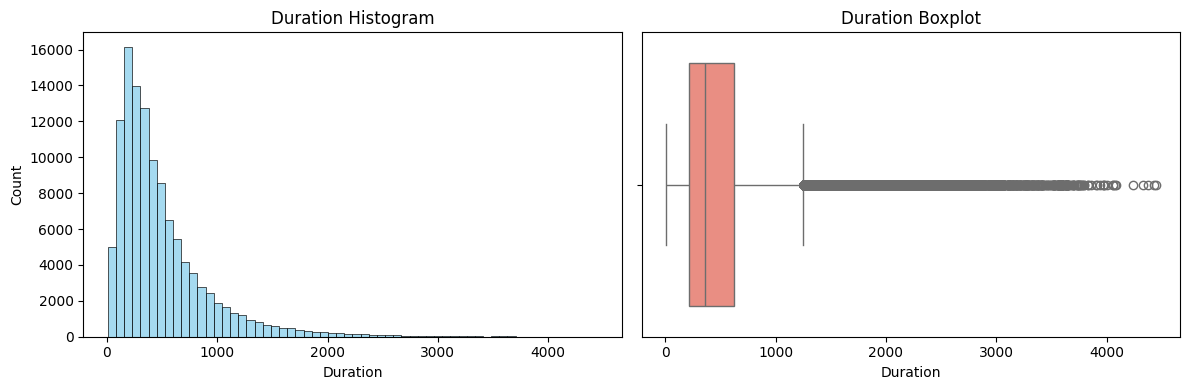

In [7]:
columns = ['Duration']

# Function that we'll use to plot all numeric variables. It recives a dataframe,
# the column to plot and a flag, indicationg if the column is the target column or not (True if its is not, False if it is).
def plot_numerical(df, columns, flag):
    num_cols = 2 + flag
    num_rows = len(columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[i*num_cols], bins=60, color='skyblue')
        axes[i*num_cols].set_title(f'{col} Histogram')

        sns.boxplot(data=df, x=col, ax=axes[i*num_cols+1], color = "salmon")
        axes[i*num_cols+1].set_title(f'{col} Boxplot')

        if flag:
            sns.scatterplot(data=df, x='Duration', y=col, ax = axes[i*num_cols + 2], color="skyblue", s  = 3)
            axes[i*num_cols+2].set_title(f'Duration vs. {col}')

    for j in range(num_rows * num_cols, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical(df, columns, False)

El histograma de duración es fácil de comprender. La mayoría de las llamaradas solares tienen una duración de aproximadamente 400 segundos, mientras que muchas erupciones duran mucho más tiempo. Se observa que la distribución no es normal, sino que se asemeja más a una distribución chi-cuadrado u otra similar. También se nota que, al no ser normal, los métodos convencionales de detección de valores atípicos indican una cantidad excesiva de datos anómalos. Por lo tanto, será necesario recurrir a otros métodos para identificarlos.

La duración promedio de una llamarada es de 493.64 segundos u 8.2 min. Duran entre 8 segundos a una hora y 15 minutos, por lo que son sucesos cortos de actividad solar.

### Análisis de datos tipo fecha

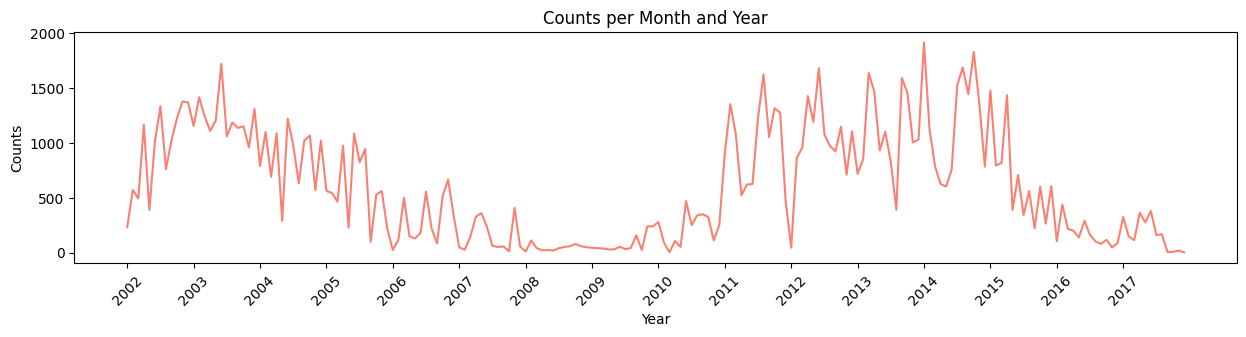

In [8]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
counts_per_month_year = df.groupby(['Year', 'Month']).size()

plt.figure(figsize=(15, 3))
ax = counts_per_month_year.plot(color='salmon')  # Change the color to salmon
plt.title('Counts per Month and Year')
plt.xlabel('Year')
plt.ylabel('Counts')

# Modify x-axis ticks and labels
ticks = range(0, len(counts_per_month_year), 12)  # Adjust the step as needed
labels = [f"{year}" for year, month in counts_per_month_year.index]
ax.set_xticks(ticks)
ax.set_xticklabels([labels[i] for i in ticks], rotation=45)

plt.show()

En esta gráfica que muestra las llamaradas solares por mes, podemos observar el ciclo solar. Según datos externos, sabemos que el ciclo solar tiene una duración aproximada de 11 años, y aquí en esta gráfica podemos notar que la cantidad de erupciones solares sigue este ciclo y oscila a lo largo de los años. Si notamos la duración de las llamaradas en cada uno de los años del ciclo solar podremos ver un patrón. Tomaremos como inicio del ciclo solar el año 2008.

In [9]:
# Calculate the solar cycle based on the year starting from 2008
df['Solar cycle'] = ((df['Date'].dt.year - 2008) % 11) + 1

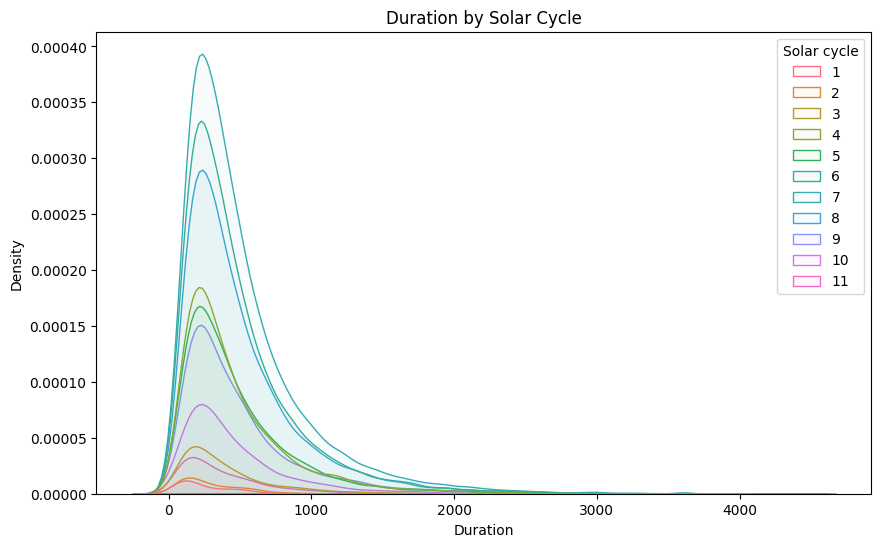

In [10]:
base_color = '#FF5733'
num_colors = 11
cyclic_palette = sns.color_palette("husl", num_colors)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Duration', hue='Solar cycle', fill =True, palette=cyclic_palette, alpha = 0.04)
plt.title('Duration by Solar Cycle')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

Vemos que en la mitad del ciclo (años 5-9) la cantidad de llamaradas solares es mucho mayor que a los extremos del ciclo. También es aparente que la varianza de estas llamaradas es mayor en la mitad del ciclo que a los extremos, aunque tengan un promedio similar. Vemos que la duración promedio de las llamaradas se mantiene más o menos igual.

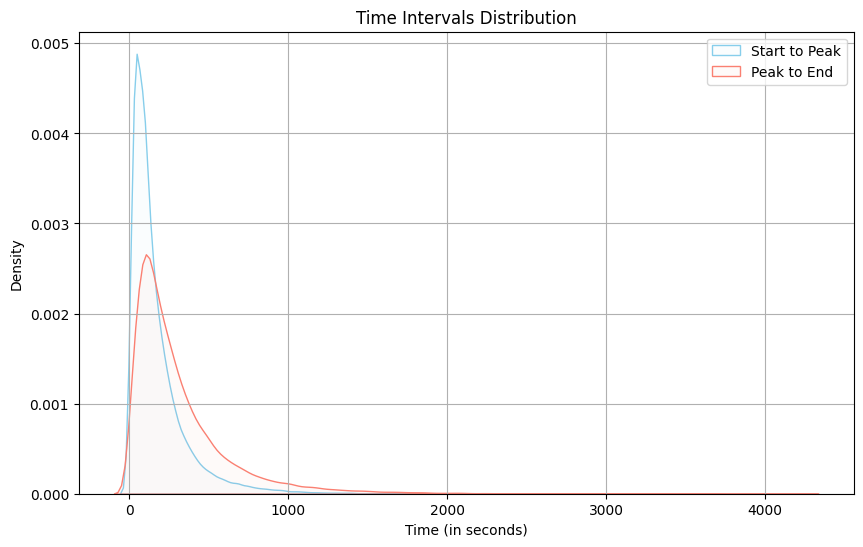

In [11]:
# Calculate difefrence between start - peak - end times
start_peak = (df["Peak time"] - df["Start time"]).dt.total_seconds()
peak_end = (df["End time"] - df["Peak time"]).dt.total_seconds()

plt.figure(figsize=(10, 6))
sns.kdeplot(start_peak, label='Start to Peak', color='skyblue', fill =True, alpha = 0.04)
sns.kdeplot(peak_end, label='Peak to End', color='salmon', fill =True, alpha = 0.04)

plt.title('Time Intervals Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que el tiempo que una llamarada tarda en llegar a su pico es mayor que la que necesita para terminar. Esto se confirma con la idea de que una vez que una erupción libera una gran energía en su pico, se termina muy rápido, ya que no tiene energía para sostenerse.

### Análisis de datos categóricos

Ya que los datos en la categoría `Flags` son tratados como una lista, convertiremos cada posible `flag` para analizarla independientemente

In [12]:
split_values = df['Flag 5'].str.split(' ', expand=True).add_prefix('FlagN ')
df = pd.concat([df, split_values], axis = 1)
flags = df.filter(like = "Flag")
flags = flags.drop("Flag 5", axis = 1)
flag_dummies = pd.get_dummies(flags, prefix="Flag")
flags = flag_dummies.groupby(flag_dummies.columns.str[-2:], axis=1).sum().astype(bool)
flags["A"] = flags.apply(lambda x: "A0" if x["A0"] == 1 else ("A1" if x["A1"] == 1 else "A3"), axis=1)
flags["Q"] = flags.apply(lambda x: "Q1" if x["Q1"] == 1 else ("Q2" if x["Q2"] == 1 else ("Q3" if x["Q3"] == 1 else ("Q4" if x["Q4"] == 1 else ("Q5" if x["Q5"] == 1 else ("Q6" if x["Q6"] == 1 else "Q7"))))), axis=1)
flags.drop(columns=["A1", "A0", "A3","Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7"], inplace=True)
df = pd.concat([df, flags], axis=1)
df = df.filter(regex="^(?!.*Flag)")
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,...,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,...,False,False,False,False,False,False,False,False,A1,Q7
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,...,False,False,False,False,False,False,False,False,A1,Q1
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,...,False,False,False,False,False,False,False,False,A1,Q7
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,...,False,False,False,False,False,False,False,False,A1,Q7
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,...,False,False,False,False,False,False,False,False,A1,Q2


Analizaremos primero todas las flages excepto `A` y `Q`

In [13]:
df.describe(include = "bool")

,DF,DR,EE,ES,GD,GE,GS,NS,P1,PE,PS,SD,SE,SS,a0,a1,a2,a3
count,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
freq,75552,71861,113266,112562,115849,111552,111653,115407,109342,65110,110109,115998,114574,116063,110954,114122,116141,116011


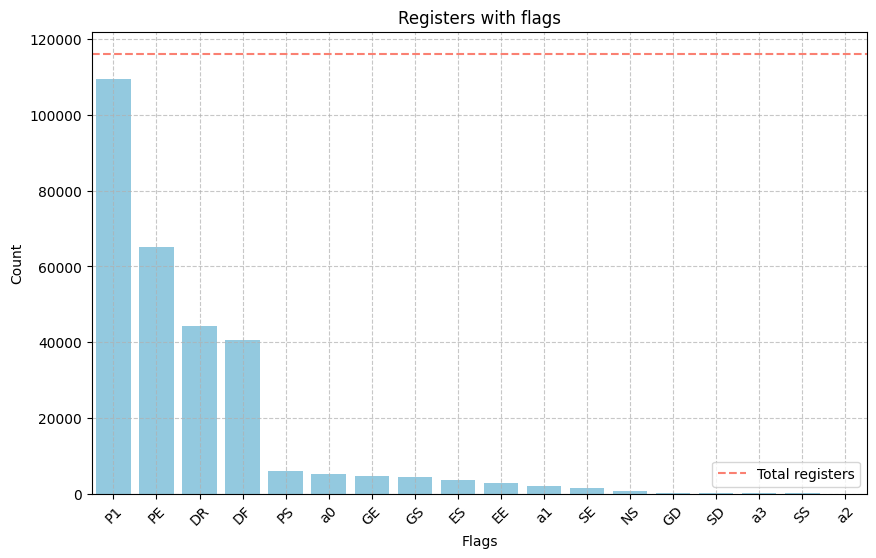

In [14]:
quality_columns = ['DF', 'DR', 'EE', 'ES', 'GD', 'GE', 'GS', 'NS', 'P1',
                   'PE', 'PS', 'SD', 'SE', 'SS', 'a0', 'a1', 'a2', 'a3']

plt.figure(figsize=(10, 6))
count_df = df[quality_columns]
quality_count_df = count_df.sum().sort_values(ascending=False)
sns.barplot(x=quality_count_df.index, y=quality_count_df, color='skyblue')
plt.axhline(y=116143, color='Salmon', linestyle='--', label='Total registers')
plt.title('Registers with flags')
plt.xlabel('Flags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

- Según el diccionario de datos, P1 indica una posición válida de los sensores. No hay datos disponibles para P0, que representaría una posición inválida, pero es posible que aquellos no marcados con P1 carezcan de una posición válida. La mayoría de los datos tienen una posición válida.
- Se registraron muchos datos como PE, lo que indica la presencia de partículas al momento de la medición. Esto sugiere que en estos casos, el Sol no solo emitió radiación, sino también materia.
- En algunos registros, se observa que los valores de DR y DF son verdaderos. Esto podría significar que en algún momento durante la medición, una parte del instrumento sufrió decimación, lo que resultaría en una menor calidad del registro.
- Además de PE, algunos pocos datos presentan otras categorías, como PS, que señala un posible destello solar (aunque no confirmado), y GE, GD y GS, indicando una brecha en la transmisión de datos. También están ES y EE, que indican que el instrumento perdió de vista al Sol debido a que la Tierra lo tapaba, entre otros. Para nuestro modelo, sería prudente no utilizar estos datos, ya que hay pruebas físicas que indican que no tienen la calidad suficiente.

Ahora analizaremos las columnas `Energy`, `A` y `Q`

In [15]:
df.describe(include='object')

,Energy,A,Q
count,116143,116143,116143
unique,9,3,7
top,6-12,A0,Q1
freq,86959,107773,42348


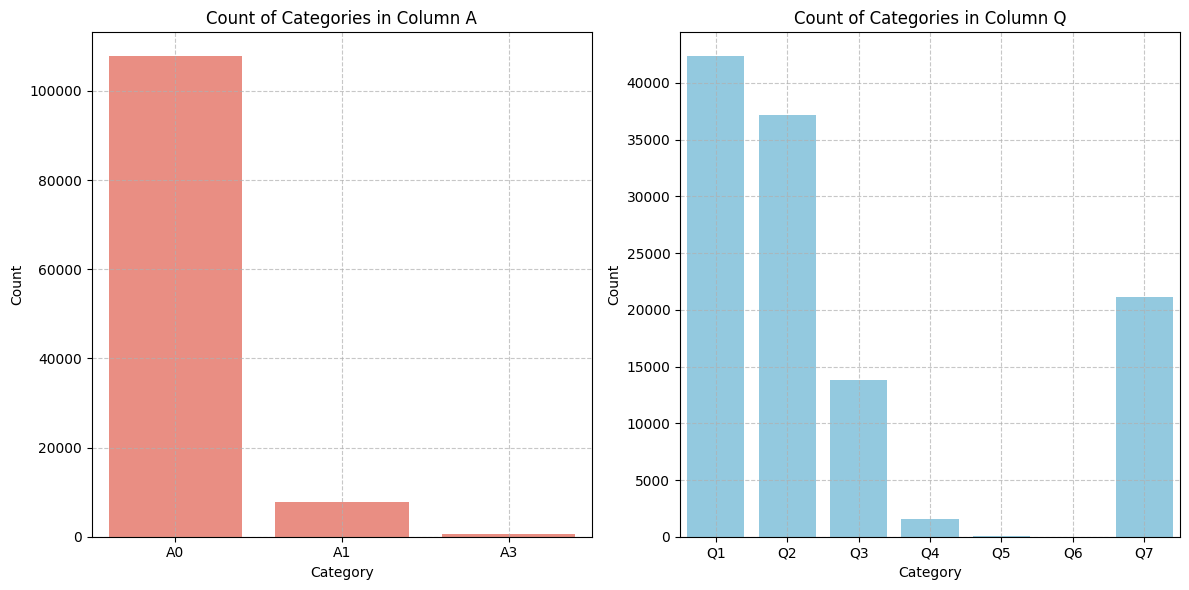

In [16]:
order_A = ['A0', 'A1', 'A3']
order_Q = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', "Q6", "Q7"]

# Plotting with seaborn
plt.figure(figsize=(12, 6))

# Plot for column "A"
plt.subplot(1, 2, 1)
sns.countplot(x=df['A'], order=order_A, color='salmon')
plt.title('Count of Categories in Column A')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for column "Q"
plt.subplot(1, 2, 2)
sns.countplot(x=df['Q'], order=order_Q, color='skyblue')
plt.title('Count of Categories in Column Q')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- La columna A denota el estado del atenuador en el pico del destello. Se nota que en la mayoría de los casos su estado es normal (A0) pero en algunos está en un estado grueso (A1) y en otros esta en estado grueso y delgado (A3).
- La columna Q denota la calidad general del registro. En este caso Q1 es la calidad más alta y Q11 la calidad más baja. Vemos que ningún dato pasa de calidad Q5 por lo que los datos tendrían buena calidad en este caso. Es posible que la NASA haya eliminado automáticamente los datos con calidad menor a `Q6`, lo que explicaría la ausencia de datos de baja calidad.

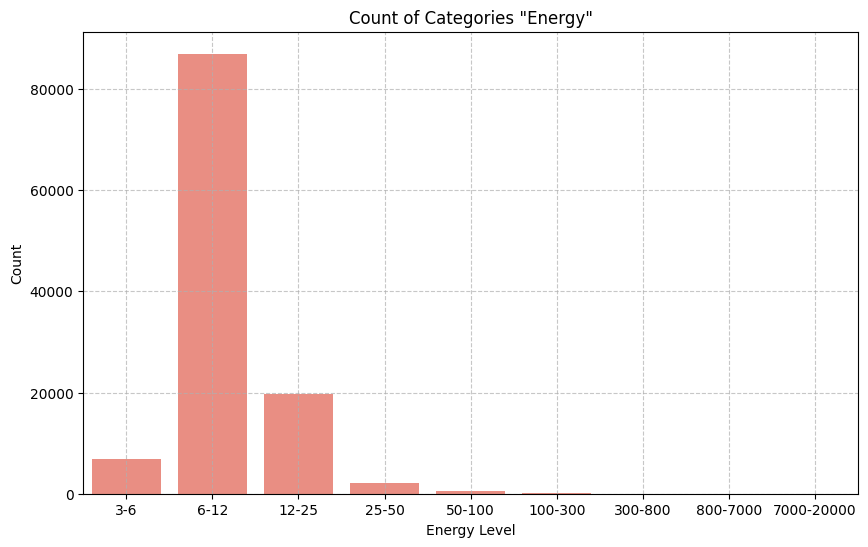

In [17]:
order = ["3-6", "6-12", "12-25", "25-50", "50-100", "100-300", "300-800", "800-7000", "7000-20000"]
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Energy'], color='salmon', order = order)
plt.title('Count of Categories "Energy"')
plt.xlabel('Energy Level')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

Vemos que la mayoría de datos están en un rango de 6-12 KeV, con muy pocos datos en las otras categorías. Esto concuerda con lo que se detecta. Es muy extraño que haya muchas llamaradas solares de alta energía y también es difícil de detectar llamaradas de baja energía con los instrumentos modernos.

<Figure size 640x480 with 0 Axes>

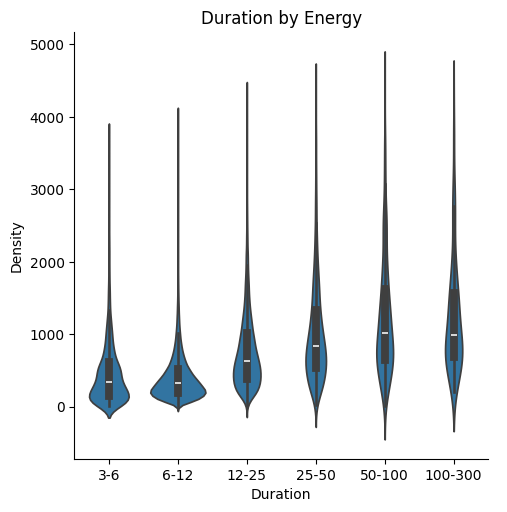

<Figure size 640x480 with 0 Axes>

In [18]:
# The following categories have a very small number of samples, so we won't see their distribution
df_limited_energy = df[(df["Energy"] != "7000-20000") & (df["Energy"] != "800-7000") & (df["Energy"] != "300-800")]

# Due to a bug in matplotlib
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Figure
order = ["3-6", "6-12", "12-25", "25-50", "50-100", "100-300"]

plt.figure(layout='constrained')
sns.catplot(data=df_limited_energy, x="Energy", y="Duration", kind="violin", order = order)
plt.title('Duration by Energy')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()
plt.tight_layout()

Al graficar las distribuciones de `Duration` para cada nivel de `Energy`, se observan patrones diversos. Estas distribuciones exhiben diferentes valores medios y variabilidades. Mientras algunas muestran una forma de campana, especialmente las de niveles de energía más altos, otras presentan una marcada asimetría. Incluso, en el caso de la primera, se aprecian dos picos distintivos. Esto se puede deber a que hay más datos de los primeros tipos de energía, por lo que su variablilidad es mayor.

### Análisis datos numéricos

Procederemos a analizar los datos numéricos. `Flare`, siendo un ID no lo incluiremos en nuestro análisis. `Duration` también lo excluiremos.

In [19]:
df.describe(include = ["int", "float"])[["Peak counts", "Total counts", "X pos", "Y pos", "Radial", "Active region"]]

,Peak counts,Total counts,X pos,Y pos,Radial,Active region
count,116143.00,116143.00,116143.00,116143.00,116143.00,116143.00
mean,215.09,376884.26,-7.68,-42.19,687.90,990.07
std,839.38,3048797.06,755.77,401.90,511.36,1351.85
min,0.00,8.00,-10012.00,-10005.00,0.00,0.00
25%,28.00,22840.00,-701.00,-247.00,467.00,0.00
50%,56.00,58560.00,0.00,-71.00,759.00,691.00
75%,144.00,179808.00,708.00,198.00,946.00,1564.00
max,113156.00,435550080.00,1190.00,1223.00,14154.00,9999.00


Vemos que no hay datos faltantes en la categoría de numéricos. La cantidad total de picos de radiación o `Peak counts` que recibe cada instrumento por segundo va desde 0 hasta 113,156, por lo que hay mucha variabilidad. En `Total counts` la situación es parecida. Veamos la distribución de estos datos.

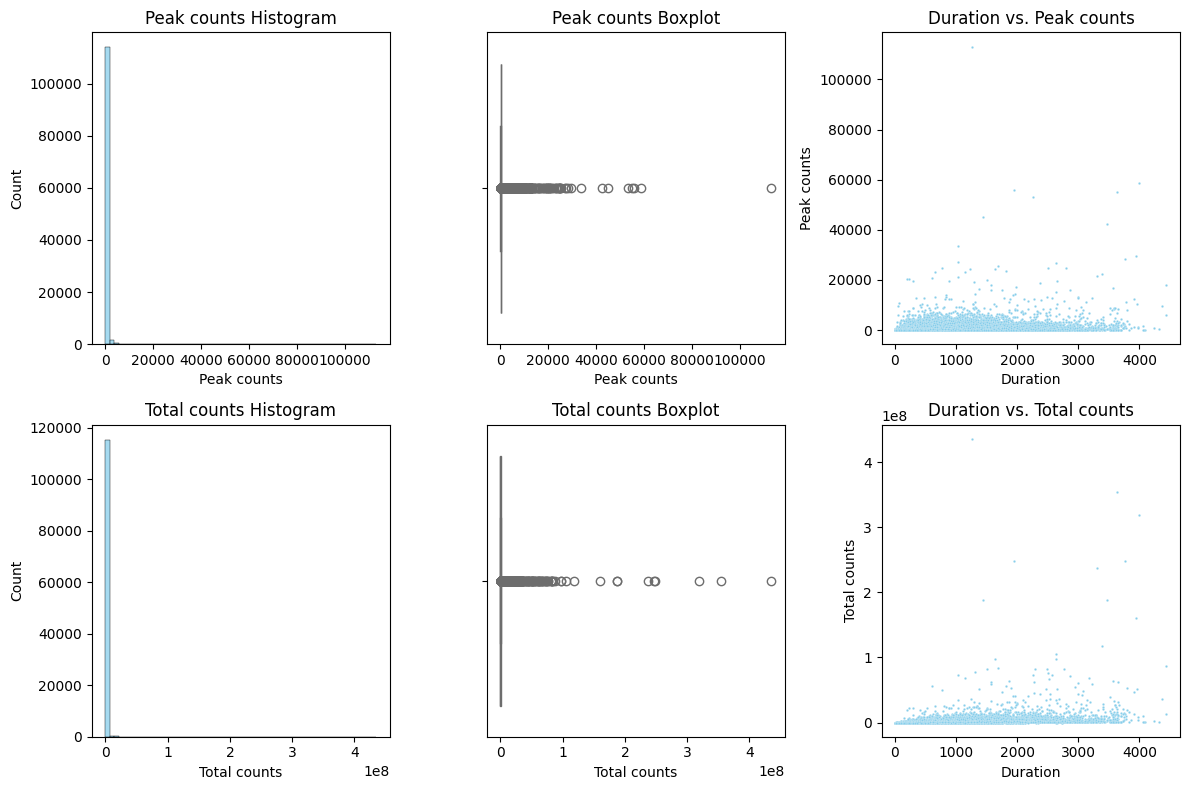

In [20]:
columns = ['Peak counts', 'Total counts']
plot_numerical(df, columns, True)

Vemos que para `Peak counts` y  `Total counts` hay outliers absurdamente grandes, tanto que afectan de sobremanera la distribución de los datos en estas columnas. Si viésemos su distribución limitando sus valores, podríamos verla mejor.

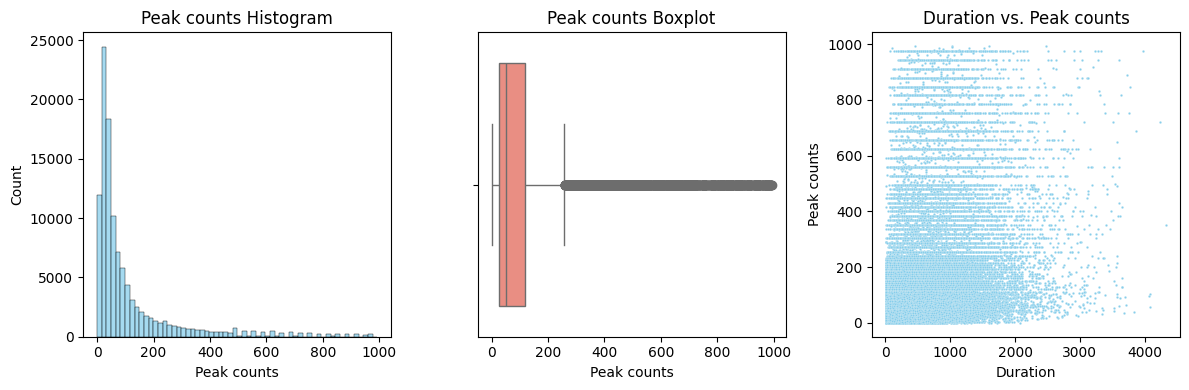

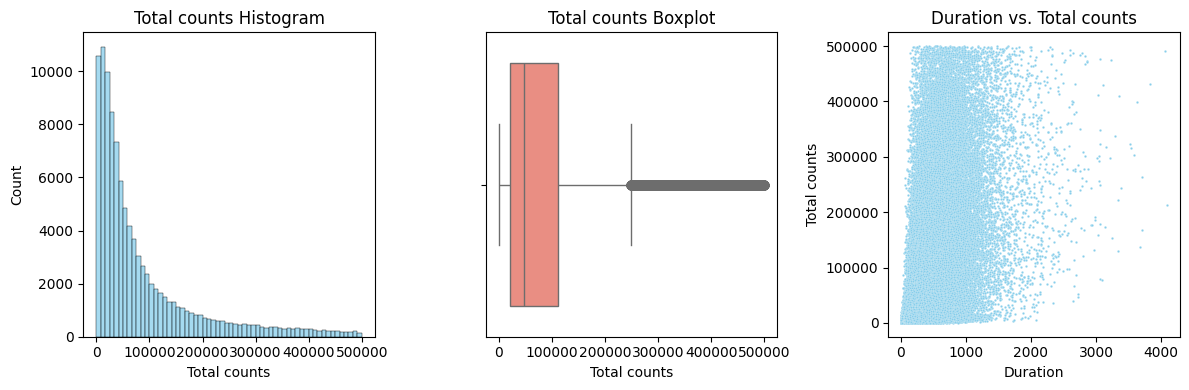

In [21]:
lim_peak_counts = df[df["Peak counts"]<= 1000]
lim_total_counts = df[df["Total counts"]<= 500000]
plot_numerical(lim_peak_counts, ["Peak counts"], True)
plot_numerical(lim_total_counts, ["Total counts"], True)

Ahora si podemos observar a profundidad las distribuciones de estas columnas. Nótese que no son distribuciones normales. En las dos, hay una candidad alta de valores comunes, para `Peak counts` la mayoría de registros están alrededor de 50 y para `Total counts` están en 50000. Sin embargo para las dos columnas hay muchos datos muy grandes, que clasificarían como outliers.

Sabemos por el tamaño del sol en el cielo de que `Radial` no puede ser mayor a 1865 arcosegundos.

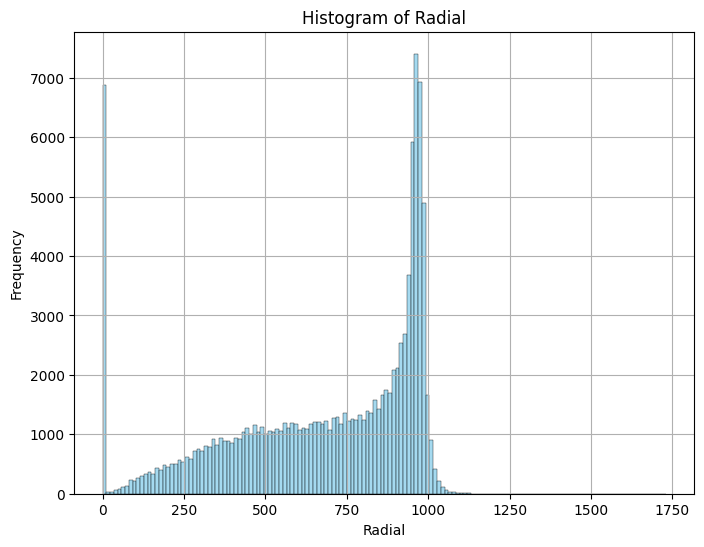

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df["Radial"]< 1865], x='Radial', color='skyblue', edgecolor='black', bins = 150)
plt.title('Histogram of Radial')
plt.xlabel('Radial')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Vemos una concentración notable de datos alrededor de los 1000 arcosegundos, con una escasez de observaciones más allá de este punto. Esto sugiere que los instrumentos de medición podrían haber estado enfocados en una región específica, posiblemente el centro del Sol donde se encuentran las manchas solares. De hecho, al graficar únicamente los puntos con un radio menor a 1000 arcosegundos, observamos un patrón que se asemeja a una forma circular (Ver siguiente).

Es importante destacar que hay un gran número de observaciones para las cuales no se dispone de información sobre el radio (`Radial` = 0).

<Figure size 1000x600 with 0 Axes>

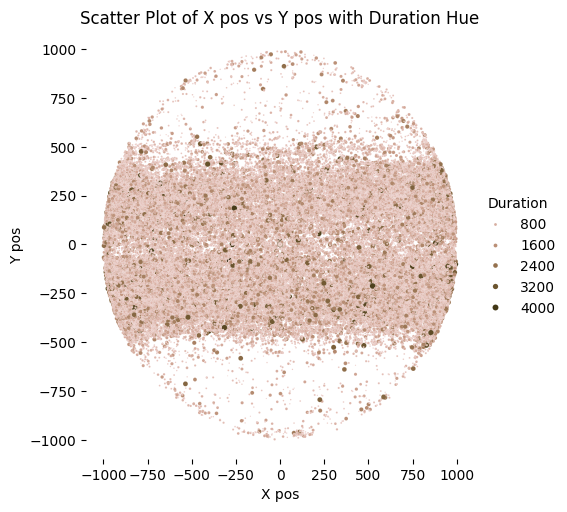

In [23]:
sun_size = df[(abs(df["Radial"]) <= 1000)].copy()

plt.figure(figsize=(10, 6))
cmap = sns.cubehelix_palette(start=1.5, rot=-.2, as_cmap=True)
g = sns.relplot(data=sun_size, x="X pos", y="Y pos", hue="Duration", size="Duration", palette=cmap, sizes=(0.5, 20),)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.title('Scatter Plot of X pos vs Y pos with Duration Hue')
plt.xlabel('X pos')
plt.ylabel('Y pos')
plt.show()

Podemos ver aquí las regiones de más actividad solar en el área donde se toman mediciones. Vemos que las llamaradas se concentran en dos franjas del centro, con mayor actividad en los extremos. La llamaradas de alta duración están distribuidas por toda la superficie.

Las regiones activas representan áreas de intensa magnetización, siendo el origen de gran parte de las llamaradas solares y las eyecciones coronales de masa. En ellas se encuentran una o más manchas solares identificadas. Como especificado en el dataset, este es un ID de la posición donde se detecta la llamarada solar. Cada vez que se encuentra una nueva región activa se le añade uno al ID. Hay una gran cantidad de datos con `Active Region` = 0, lo que indica ausencia de información.

### Dimensiones de Calidad de Datos
#### Completitud
La primera vez que examinamos los datos, notamos la presencia de numerosos valores faltantes en las columnas de `Flag n`. No obstante, al profundizar, determinamos que esta ausencia era más bien una rareza de conformidad que de datos faltantes. Por otro lado las columnas `Active Region` y `Radial` tienen muchos datos en 0, un indicador de que faltan datos. Consideramos que dejar estos valores así es pertinente, ya que como estas columnas representan un espacio, marcarlos en el origen de los datos es lo justo (nótese de que este valor también es o se acerca mucho a la mediana de los datos con los que se relacionan, `X pos` y `Y pos`). En el caso de `Active Region`, como representa un ID del lugar, no hay forma de reemplazar los valores, ya que un `Active  region` en 0 podría representar que ese lugar particular no ha sido declarado como mancha solar y por lo tanto no tiene investigación.

#### Conformidad
Ya mencionamos que las columnas de `Flag n` tenían un error de conformidad. Los datos estaban guardados como si fueran una lista a través de varias columnas. La úlima columna incluso tenía varias flags separadas por espacios, como si no les hubiera alcanzado el espacio.  Estas ya se trataron, y se almacenaron como columnas binarias o categóricas. También arreglamos un error de consistencia en las fechas, para que las veces en que una llamarada iniciara en un día y finalizara en otro fueran correctamente marcadas.

In [24]:
# Ver que todas las columans de Flags son binarias, excepto por A y Q que tienen más categorías.
df.iloc[0:5, 16:38]

,DF,DR,EE,ES,GD,GE,GS,NS,P1,PE,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,A1,Q7
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,A1,Q1
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,A1,Q7
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,A1,Q7
4,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,A1,Q2


In [25]:
# Ver que los días que una llamarada empieza muy tarde, esta termina al otro día.
df[(df["Start time"].dt.hour == 23) & (df["Start time"].dt.minute > 55)].iloc[0:5, 1:5]

,Date,Start time,Peak time,End time
73,2002-02-18,2002-02-18 23:59:48,2002-02-19 00:03:22,2002-02-19 00:09:56
118,2002-02-21,2002-02-21 23:56:36,2002-02-22 00:06:42,2002-02-22 00:57:16
205,2002-02-27,2002-02-27 23:57:04,2002-02-28 00:06:46,2002-02-28 00:07:16
298,2002-03-05,2002-03-05 23:57:28,2002-03-06 00:00:14,2002-03-06 00:02:04
905,2002-04-11,2002-04-11 23:57:36,2002-04-11 23:59:02,2002-04-12 00:06:48


Otros aspectos interesantes en relación con la dimensión de conformidad incluyen las unidades en las que se guardan algunas columnas, como los arcosegundos (una unidad común en astronomía pero no en análisis de datos). También nos llamó la atención que la energía se haya almacenado en rangos en lugar de como un dato continuo. Por último, notamos que la descripción de la columna `Active region` no es completamente clara. Consideramos que su explicación es insuficiente y no pudimos encontrar información más detallada sobre su significado.

#### Consistencia
Hay varios datos que deben ser consistentes. Por ejemplo la diferencia entre `Start time` y `End time` debe ser igual a `Duration`. Véase que lo son.

In [26]:
# Es cierto (True) que todas las duraciones son iguales que sus diferencias entre la hora inicial y final.
difference_start_end = (df['End time'] - df['Start time']).dt.total_seconds()
are_they_equal = df['Duration'] == difference_start_end
are_they_equal.unique()

array([ True])

Veamos si la fecha de la llamarada es consistente con su número de ID de la forma (y)ymmddnn.

In [27]:
def check_substring(flare, date_format):
    return date_format in flare

date_to_id_format = (df["Date"].dt.strftime("%y") + df["Date"].dt.strftime("%m").str.zfill(2) + df["Date"].dt.strftime("%d").str.zfill(2))
date_to_id_format = date_to_id_format.apply(lambda x: x[1:] if x[0] == '0' else x) # Remove leading zeroes
flare_str = df["Flare"].astype(str) # Convert to string
comparison_result = flare_str.combine(date_to_id_format, check_substring)
df[comparison_result == False].head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,...,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
479,2031533,2002-03-16,2002-03-16 00:26:28,2002-03-16 00:26:30,2002-03-16 00:34:04,456,152,347184.00,6-12,119,...,False,False,False,False,False,False,False,False,A1,Q1
906,2041169,2002-04-12,2002-04-12 00:06:48,2002-04-12 00:09:02,2002-04-12 00:13:08,380,176,161808.00,6-12,-565,...,False,False,False,False,False,False,False,False,A0,Q7
1006,2041496,2002-04-15,2002-04-15 00:41:08,2002-04-15 00:41:34,2002-04-15 00:50:24,556,46,113136.00,6-12,810,...,False,False,False,False,False,False,False,False,A1,Q7
1759,20508124,2002-05-09,2002-05-09 00:02:24,2002-05-09 00:03:10,2002-05-09 00:05:28,184,42,34608.00,6-12,879,...,False,False,False,False,False,False,False,False,A0,Q7
2907,2070201,2002-07-01,2002-07-01 23:58:40,2002-07-02 00:04:30,2002-07-02 00:08:08,568,88,121392.00,12-25,-621,...,False,False,False,False,False,False,False,False,A0,Q7


Vemos que existen fechas que no son consistentes con sus números de ID. Esto sucede comúnmente cuando la llamarada empieza a altas horas de la noche (después de las 23 horas) o a altas horas de la madrugada (antes de la una). Por lo tanto, utilizaremos mejor la fecha almacenada en la columna `Date`. Vemos que otro detalle de consistencia es que, cuando `X pos` y `Y pos` son cero,  `Radial` debería ser cero, y viceversa. Esto se cumple.

In [28]:
df[(df["X pos"]==0)&(df["Y pos"]==0)]["Radial"].unique()

array([0])

In [29]:
df[df["Radial"]==0][["X pos", "Y pos"]].describe().iloc[[3, 7],:]

,X pos,Y pos
min,0.00,0.00
max,0.00,0.00


Concluimos que los datos son consistentes, exepto por el `Flare` ID, sin embargo esto no representa un problema para nuestro proyecto.
##### Unicidad
Nuestros datos tienen un ID. Vemos que tres de ellos se repiten. Sin embargo, véase también que los registros son completamente diferentes. Concluimos que probablemente sea un error tipográfico. Nos quedaremos con ellos. Hemos notado que `Flare` no es la columna más confiable.

In [30]:
df[df["Flare"].duplicated(keep = False)]

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,...,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
14159,3042103,2003-04-21,2003-04-21 10:59:08,2003-04-21 11:01:06,2003-04-21 11:08:48,580,368,239808.00,12-25,-676,...,False,False,False,False,False,False,False,False,A0,Q3
14164,3042103,2003-04-21,2003-04-21 13:28:28,2003-04-21 13:29:26,2003-04-21 14:03:04,2076,2032,5185289.00,6-12,-24,...,False,False,False,False,False,False,False,False,A0,Q3
86839,13111351,2013-11-13,2013-11-13 11:50:40,2013-11-13 11:57:10,2013-11-13 12:04:04,804,2672,4278864.00,100-300,-670,...,False,False,False,False,False,False,False,False,A0,Q3
86843,13111352,2013-11-13,2013-11-13 12:34:40,2013-11-13 12:36:10,2013-11-13 12:40:28,348,120,148080.00,6-12,885,...,False,False,False,False,False,False,False,False,A0,Q2
86845,13111351,2013-11-13,2013-11-13 13:23:04,2013-11-13 13:23:42,2013-11-13 13:27:12,248,152,140496.00,6-12,-669,...,False,False,False,False,False,False,False,False,A0,Q3
86846,13111352,2013-11-13,2013-11-13 13:27:12,2013-11-13 13:29:34,2013-11-13 13:34:28,436,320,380976.00,12-25,-643,...,False,False,False,False,False,False,False,False,A0,Q2


#### Precisión
Con base en nuestra experiencia con los datos, hemos llegado a la conclusión de que la información es confiable y precisa. Aunque nuestra comprensión de la astronomía es limitada, hemos podido confirmar varios patrones del mundo real, como las manchas solares y el ciclo solar. Además, la entidad responsable de la publicación, la NASA, goza de una sólida reputación en el campo de la astronomía. No hemos detectado errores significativos en esta base de datos pública. Por lo tanto, concluimos que la información es lo suficientemente precisa para nuestros propósitos.

##### Integridad
Dado que solo contamos con una única base de datos, no existen relaciones con otras bases de datos. Por lo tanto, podemos confirmar la dimensión de integridad.

### Tratamiento de los datos
#### ¿Qué datos utilizaremos?
Primero quitaremos algunos datos con marcadores de mala calidad, descrito en la categoría de Flags.
Quitaremos los datos que
- La mediciones fueron decimadas (dañadas) en la mayor parte. (DF y DR)
- Los eventos no solares (NS)
- Brecha de datos en las mediciones (GD, GE, y GS)
- Lo que se ha calificado como un posible destello solar; en detectores frontales, pero sin posición. (PS)
- Hubo un eclipse en algún momento de la medición (EE y ES)
- En algún momento de la medición, la nave espacial estaba en SAA. (SS, SD, y SE)

In [31]:
df.loc[:, "Flare number"] = df["Flare"].apply(lambda x: int(str(x)[-2:])) # Ver punto siguiente
data = df[~(df["DF"] & df["DR"]) & ~df["NS"] & ~(df["GD"] & df["GE"] & df["GS"]) & ~df["PS"] & ~(df["EE"] & df["ES"]) & ~(df["SS"] & df["SD"] & df["SE"])]
data.reset_index(drop=True, inplace=True)

Ahora escogeremos las columnas que nos importan:

- De `Flare`, seleccionaremos solo la cantidad de llamaradas solares que ha habido hasta el momento durante el día. El resto de la información de la fecha la obtendremos de `Date`, de donde obtendremos el año del ciclo solar.
- `Duration`, que es nuestra columna objetivo.
- `Peak counts` y `Total counts`.
- `Energy`, a la que le aplicaremos encoding.
- `X pos`, `Y pos` y `Radial`.
- `PE`, ya que indica si hubo un evento de partículas durante la llamarada solar.


In [32]:
data = data[["Flare number", "Solar cycle", "Peak counts", "Total counts", "Energy", "X pos", "Y pos", "Radial", "PE", "Duration"]]
data.head()

,Flare number,Solar cycle,Peak counts,Total counts,Energy,X pos,Y pos,Radial,PE,Duration
0,13,6,136,167304.00,12-25,592,-358,692,False,712
1,28,6,7,9504.00,6-12,604,-341,694,True,288
2,32,6,15,11448.00,6-12,-310,375,487,False,216
3,8,6,20,17400.00,12-25,-277,378,469,False,244
4,10,6,336,313392.00,25-50,-272,390,476,True,236


Ahora procederemos con el encoding de Energy.

In [33]:
from sklearn.preprocessing import OrdinalEncoder
column = data[["Energy"]]
order = ["3-6", "6-12", "12-25", "25-50", "50-100", "100-300", "300-800", "800-7000", "7000-20000"]
enc = OrdinalEncoder(categories=[order])
label_encoding = enc.fit_transform(column)
data["Energy"] = pd.DataFrame(label_encoding)
data.tail()

,Flare number,Solar cycle,Peak counts,Total counts,Energy,X pos,Y pos,Radial,PE,Duration
93048,3,11,18,2888.00,1.00,-345,-38,347,True,124
93049,4,11,16,1656.00,1.00,-268,-38,271,True,104
93050,1,11,15,2224.00,1.00,-115,-38,121,True,148
93051,1,11,16,3312.00,1.00,115,192,223,True,236
93052,1,11,42,15816.00,1.00,926,128,935,True,492


#### Outliers
Primero quitaremos los datos posicionales que se marcan fuera del sol.

In [34]:
data = data[data["Radial"]< 1865]

Como nuestros datos no son normales, utilizaremos el método de ML: DBSCAN clustering

In [ ]:
from sklearn.cluster import DBSCAN
data_outliers = data.copy()
print(f"Shape of data : {data_outliers.shape}")
print(f"Type of data : {type(data_outliers)}")
# Create DBSCAN model with parameters
model = DBSCAN(eps=400,min_samples=3) #### Estos parametros son los que se tendrían que ajustar
# (radio de cada anillo y número mínimo de muestras en el anillo para que sean válidos)
# Fit model to data
model.fit(data_outliers)
# Printing total number of outliers
print(f"Total number of outliers : {sum(model.labels_ == -1)}")
# Outliers
outliers_index = model.labels_ == -1
data_no_outliers = data_outliers[~outliers_index]
data_no_outliers.reset_index(drop=True, inplace=True)
data = data_no_outliers.copy()

Shape of data : (92928, 10)
Type of data : <class 'pandas.core.frame.DataFrame'>
Total number of outliers : 17669


Veamos la distribución de nuestros nuevos datos y comprobemos visualmente que no hay ningún outlier aparente.

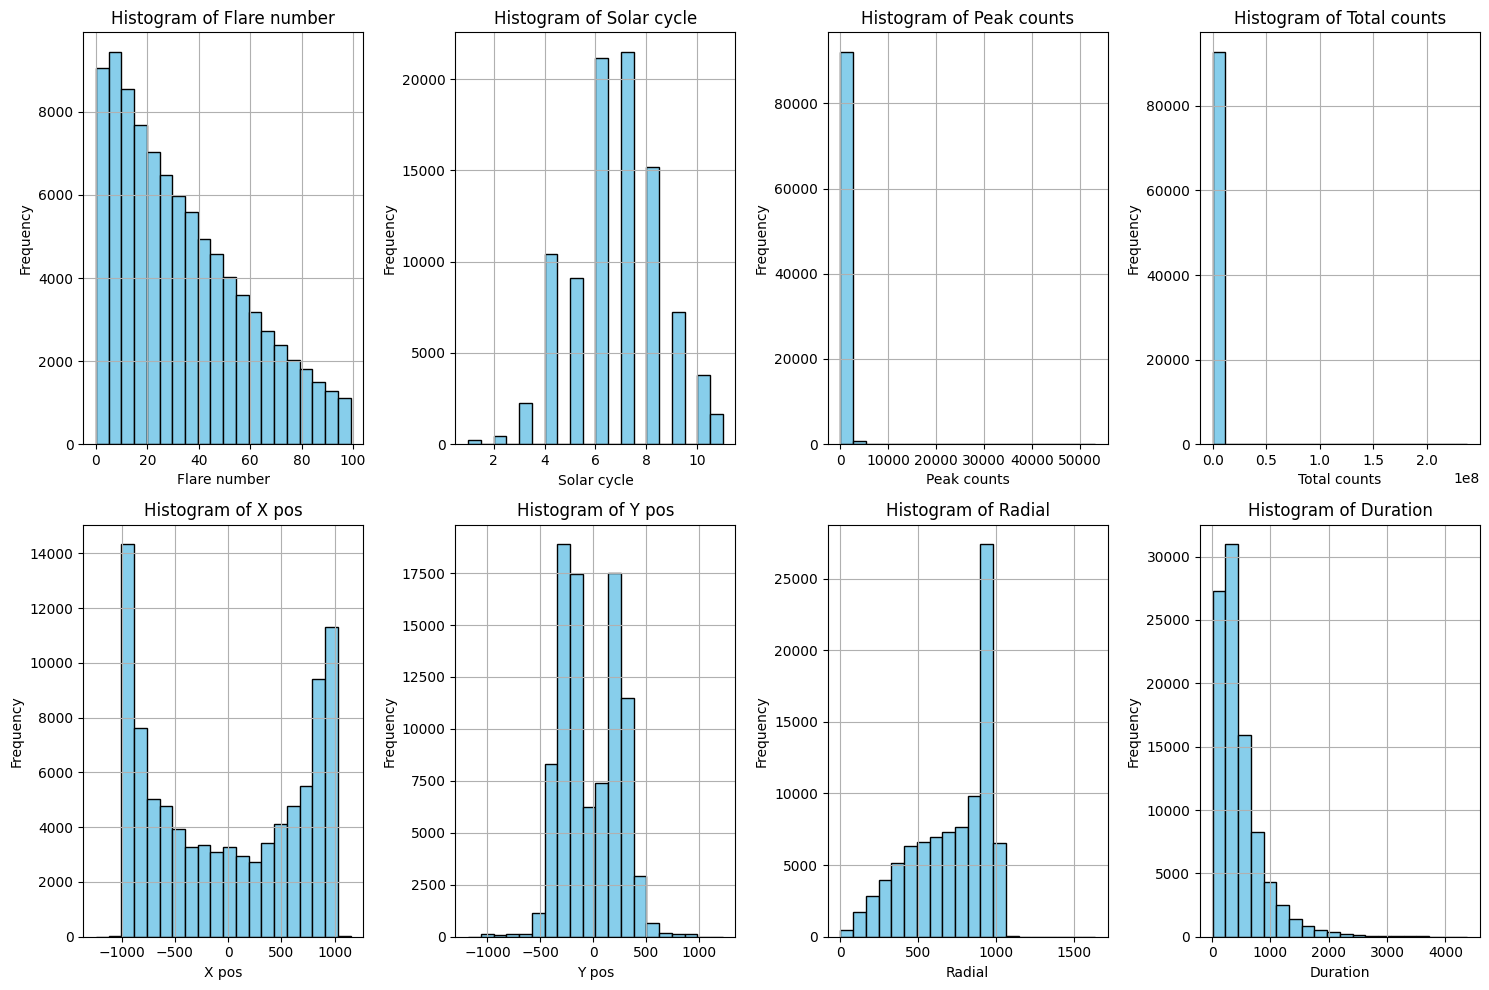

In [35]:
columns = ["Flare number", "Solar cycle", "Peak counts", "Total counts", "X pos", "Y pos", "Radial", "Duration"]

num_cols = 4
num_rows = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(True)

for i in range(len(columns), num_rows * num_cols):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


Vemos que en compraración a las gráficas de análisis de cada variable, ya las distribuciones se ven mejor.

#### Importancia de variables
Veamos cuales variables tienen más relación con duración.

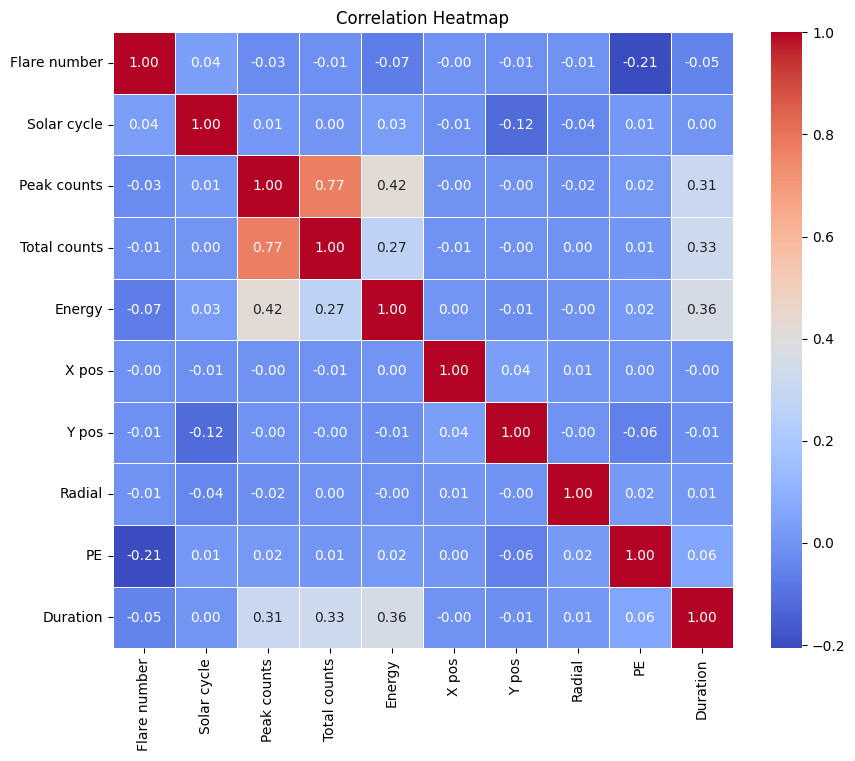

In [36]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Vemos que `Total Counts`, `Peak counts` y `Energy` tienen una relación lineal muy fuerte. ¿Es posible que haya relaciones no lineales con otras variables?

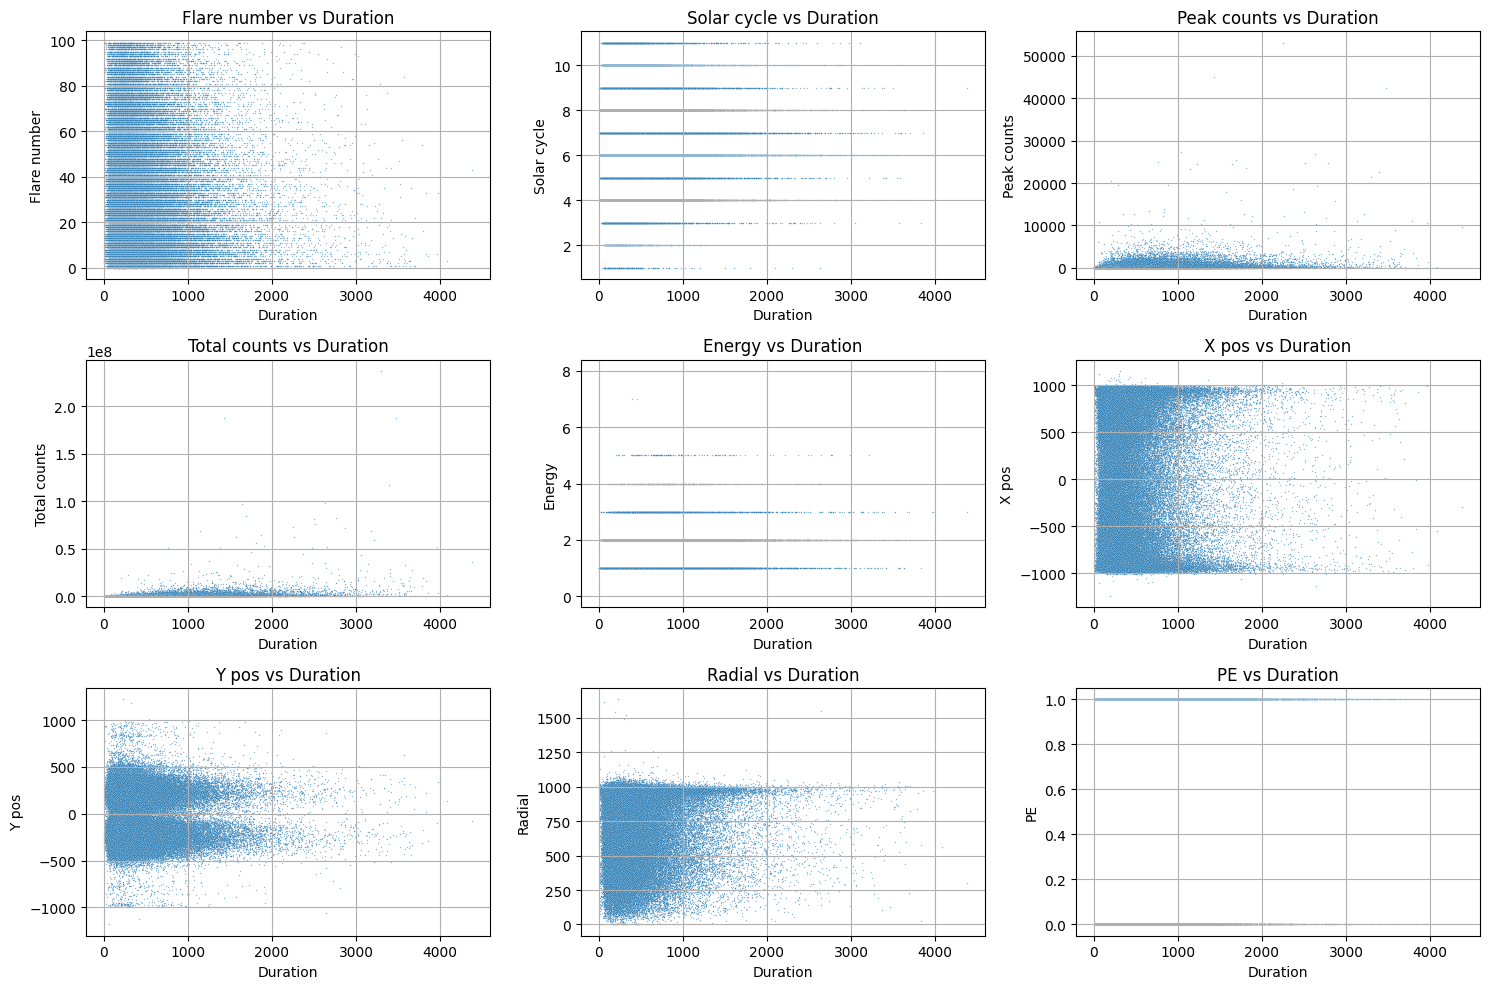

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = data.columns.tolist()

# Remove "Duration" from the list if it exists
if "Duration" in columns_to_plot:
    columns_to_plot.remove("Duration")

# Calculate the number of rows and columns for the grid layout
num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each variable against "Duration"
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.scatterplot(data=data, x="Duration", y=column, alpha=0.5, ax=ax, s  = 1)
    ax.set_title(f"{column} vs Duration")
    ax.set_xlabel("Duration")
    ax.set_ylabel(column)
    ax.grid(True)

# Hide empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Vemos que aunque no haya una relación lineal, otras columnas pueden tener un gran impacto en la duración. Por ejemplo, `X pos`, `Y pos`, `Radial`, `Flare number`, `Solar Cycle` tienen patrones interesantes cuando se las grafica en contra de `Duration`, los cuales un modelo de ML podría reconocer. De igual manera, parece ser que `Total Counts`, `Peak counts`, `Energy`, `X pos`, `Y pos`, `Radial` son las que tienen un mayor impacto. Esto se alinea con lo que entendemos del negocio. La duración de una llamarada solar depende mucho de su energía, tasa de radiación, y su ubicación en el sol.

#### División de los datos en entrenamiento, validación y prueba

In [38]:
from sklearn.model_selection import train_test_split
var_salida = "Duration"
data_x = data.drop(columns=[var_salida])
data_y = data[var_salida]
semilla = 42

# Proporcion de datos en train, validation y test
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Realizar la division en dos pasos (primero train y val/test, y luego val/test en validation y test)
x_train, x_val_test, y_train, y_val_test = train_test_split(data_x, data_y, test_size= validation_ratio + test_ratio, random_state = semilla)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = semilla)

In [ ]:
print("X train shape", x_train.shape)
print("y train shape", y_train.shape)
print("X val shape", x_val.shape)
print("y val shape", y_val.shape)
print("X test shape", x_test.shape)
print("y test shape", y_test.shape)

X train shape (45155, 9)
y train shape (45155,)
X val shape (15052, 9)
y val shape (15052,)
X test shape (15052, 9)
y test shape (15052,)


### Modelación

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Definir listas de características a probar
feature_sets = [
    ['Total counts', 'Peak counts', 'Energy', 'X pos', 'Y pos', 'Radial'],
    ['Total counts', 'Peak counts', 'Energy'],
    ['Total counts', 'X pos', 'Y pos']
    # Se pueden añadir más combinaciones posibles.
]

# Definir hiperparámetros para ajustar
tree_params = {'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 5, 10]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 5, 10]}
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10]}

# Semilla aleatoria
seed = 42

# Función para evaluar modelo
def evaluate_model(model, x, y, metric):
    predictions = model.predict(x)
    if metric == 'mae':
        return mean_absolute_error(y, predictions)
    elif metric == 'mse':
        return mean_squared_error(y, predictions)
    elif metric == 'mape':
        return np.mean(np.abs((y - predictions) / y)) * 100

# Seleccionar la métrica de evaluación
evaluation_metric = 'mae'  # Puedes cambiar esto a 'mse' o 'mape' según tu preferencia

# Ciclo para entrenar y evaluar modelos
best_model = None
best_metric_score = float('inf')
best_model_params = None
best_feature_set = None

for feature_set in feature_sets:
    for max_depth in tree_params['max_depth']:
        for min_samples_leaf in tree_params['min_samples_leaf']:
            # Entrenar modelos
            dt_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=seed)
            dt_model.fit(x_train[feature_set], y_train)
            dt_score = evaluate_model(dt_model, x_val[feature_set], y_val, evaluation_metric)

            if dt_score < best_metric_score:
                best_model = dt_model
                best_metric_score = dt_score
                best_model_params = {'model': 'Decision Tree', 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
                best_feature_set = feature_set

    for n_estimators in rf_params['n_estimators']:
        for max_depth in rf_params['max_depth']:
            for min_samples_leaf in rf_params['min_samples_leaf']:
                # Entrenar modelos
                rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=seed)
                rf_model.fit(x_train[feature_set], y_train)
                rf_score = evaluate_model(rf_model, x_val[feature_set], y_val, evaluation_metric)

                if rf_score < best_metric_score:
                    best_model = rf_model
                    best_metric_score = rf_score
                    best_model_params = {'model': 'Random Forest', 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
                    best_feature_set = feature_set

    for n_estimators in gb_params['n_estimators']:
        for learning_rate in gb_params['learning_rate']:
            for max_depth in gb_params['max_depth']:
                # Entrenar modelos
                gb_model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=seed)
                gb_model.fit(x_train[feature_set], y_train)
                gb_score = evaluate_model(gb_model, x_val[feature_set], y_val, evaluation_metric)

                if gb_score < best_metric_score:
                    best_model = gb_model
                    best_metric_score = gb_score
                    best_model_params = {'model': 'Gradient Boosting', 'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
                    best_feature_set = feature_set

print("Mejor modelo según", evaluation_metric)
print("Modelo:", best_model_params['model'])
print("Parámetros:", best_model_params)
print("Columnas:", best_feature_set)
print("Score:", best_metric_score)

